In [1]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


📊 CLASSIFICATION REPORT (Threshold = 0.5):

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      2627
           1       0.75      0.86      0.80      2366

    accuracy                           0.80      4993
   macro avg       0.80      0.80      0.80      4993
weighted avg       0.80      0.80      0.80      4993

🔸 ROC AUC: 0.8780

🔎 Threshold = 0.2
              precision    recall  f1-score   support

           0       0.95      0.48      0.64      2627
           1       0.63      0.97      0.76      2366

    accuracy                           0.72      4993
   macro avg       0.79      0.73      0.70      4993
weighted avg       0.80      0.72      0.70      4993


🔎 Threshold = 0.3
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      2627
           1       0.68      0.95      0.79      2366

    accuracy                           0.76      4993
   macro avg       0.80    

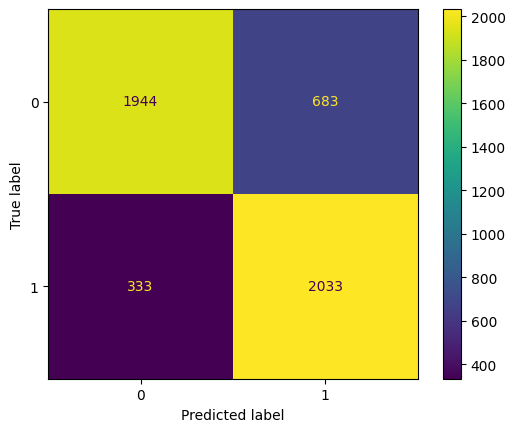

In [2]:
import sys
sys.path.append(r'C:\Users\VAGDEVI\Desktop\hybrid_recommender')  # ✅ Only folder path

from recommender import hybrid_recommend  # ✅ Now this should work


In [3]:
df = pd.read_csv(r"C:\Users\VAGDEVI\Desktop\hybrid_recommender\data\ecom_dataset.csv")

In [4]:
import pickle

# Load classifier
with open(r"C:\Users\VAGDEVI\Desktop\hybrid_recommender\classifier_model.pkl", "rb") as f:
    classifier = pickle.load(f)

# Load image features
with open(r"C:\Users\VAGDEVI\Desktop\hybrid_recommender\image_features_all.pkl", "rb") as f:
    image_features = pickle.load(f)


In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
test_prod_ids = test_df['ProdID'].tolist()


In [9]:
test_df

,ProdID,Description,price,Name,imgUrl,Category,Price,stars,gender,reviews,image_path
6868,B01J676MLS,5 Pairs Blue Aqua Waterproof Fully Latex Coate...,13.65,5 Pairs Blue Aqua Waterproof Fully Latex Coate...,https://m.media-amazon.com/images/I/51lwqKKHtq...,Agricultural Equipment & Supplies,1228.5,4.5,NaN,493,images\B01J676MLS.jpg
24016,B00K8U2EBK,Celestron 82050 Trailseeker with Fluid Pan Hea...,105.00,Celestron 82050 Trailseeker with Fluid Pan Hea...,https://m.media-amazon.com/images/I/71r3ToP1vJ...,Tripods & Monopods,9450.0,4.4,NaN,589,images\B00K8U2EBK.jpg
9668,B0C5476NS2,adidas Girl's Essentials Aeroready Seasonal Pr...,23.00,adidas Girl's Essentials Aeroready Seasonal Pr...,https://m.media-amazon.com/images/I/71Eg3QNY8s...,Sports & Outdoors,2070.0,0.0,NaN,0,images\B0C5476NS2.jpg
13640,B0CB5MQF6B,Women's Golf Single Clubs Left Handed Golf Iro...,209.99,Women's Golf Single Clubs Left Handed Golf Iro...,https://m.media-amazon.com/images/I/61DXmjBXoI...,Sports & Outdoors,18899.1,0.0,NaN,0,images\B0CB5MQF6B.jpg
14018,B0BWLCJZP3,"Heated Vest, Machine Washable Smart Heated Ves...",20.50,"Heated Vest, Machine Washable Smart Heated Ves...",https://m.media-amazon.com/images/I/51heX08S7N...,Sports & Outdoors,1845.0,0.0,NaN,0,images\B0BWLCJZP3.jpg
...,...,...,...,...,...,...,...,...,...,...,...
8670,B0C4PKXRT5,NIKE Women's Phnx Hooded Sweatshirt,50.40,NIKE Women's Phnx Hooded Sweatshirt,https://m.media-amazon.com/images/I/51NjlK+Kd-...,Sports & Outdoors,4536.0,0.0,NaN,0,images\B0C4PKXRT5.jpg
11839,B07953NH8G,InkJello Compatible Toner Cartridge Replacemen...,59.99,InkJello Compatible Toner Cartridge Replacemen...,https://m.media-amazon.com/images/I/61hJcNB78j...,Printers & Accessories,5399.1,4.6,NaN,5,images\B07953NH8G.jpg
4013,B0BV38Y2H3,CHANYI Mens 3D Print t-shirts Outdoor Hunting ...,19.89,CHANYI Mens 3D Print t-shirts Outdoor Hunting ...,https://m.media-amazon.com/images/I/61TY1Eg4i7...,Sports & Outdoors,1790.1,0.0,NaN,0,images\B0BV38Y2H3.jpg
21147,B004HVKAAS,Count Your Chickens! Board Game,18.95,Count Your Chickens! Board Game,https://m.media-amazon.com/images/I/81SgWM0tPv...,Games & Game Accessories,1705.5,4.7,NaN,1643,images\B004HVKAAS.jpg


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, ndcg_score
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

def evaluate_hybrid_model(df, classifier, image_features, k=10, sample_size=200):
    # === Classification Evaluation ===
    print("\n📊 CLASSIFIER EVALUATION:")
    df['label'] = (df['stars'] >= 2).astype(int)
    df['text'] = df[['Name', 'Description']].fillna('').agg(' '.join, axis=1)

    # Load vectorizer + classifier
    with open(r"C:\Users\VAGDEVI\Desktop\hybrid_recommender\tfidf_vectorizer.pkl", "rb") as f:
        tfidf = pickle.load(f)
    with open(r"C:\Users\VAGDEVI\Desktop\hybrid_recommender\classifier_model.pkl", "rb") as f:
        clf = pickle.load(f)

    tfidf_matrix = tfidf.transform(df['text']).toarray()
    tfidf_df = pd.DataFrame(tfidf_matrix, index=df.index)

    image_vectors = []
    for pid in df['ProdID']:
        vec = image_features.get(pid)
        if vec is None or not isinstance(vec, (np.ndarray, list)):
            image_vectors.append(np.zeros(512, dtype=np.float32))
        else:
            image_vectors.append(np.array(vec, dtype=np.float32))
    image_df = pd.DataFrame(image_vectors, index=df.index)

    combined_features = pd.concat([tfidf_df, image_df], axis=1)
    combined_features = combined_features.apply(pd.to_numeric, errors='coerce').fillna(0)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(combined_features)

    y_proba = clf.predict_proba(X_scaled)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)

    print(classification_report(df['label'], y_pred))
    print(f"🔸 ROC AUC: {roc_auc_score(df['label'], y_proba):.4f}")
    cm = confusion_matrix(df['label'], y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # === Ranking-based Hybrid Recommendation Evaluation ===
    print("\n📈 HYBRID RECOMMENDER EVALUATION (TOP-{k}):")
    precision_scores = []
    recall_scores = []
    ndcg_scores = []

    for i in range(min(sample_size, len(df))):
        prod_id = df.iloc[i]['ProdID']
        actual_category = df.iloc[i]['Category']

        # Ground truth = items in same category with stars >= 2
        ground_truth = set(
            df[(df['Category'] == actual_category) & (df['stars'] >= 2) & (df['ProdID'] != prod_id)]['ProdID']
        )

        from_main = hybrid_recommend(prod_id, top_n=k)
        recommended_ids = [r['ProdID'] for r in from_main]

        relevance = [1 if rid in ground_truth else 0 for rid in recommended_ids]
        if sum(relevance) == 0:
            continue

        precision = sum(relevance) / k
        recall = sum(relevance) / len(ground_truth) if ground_truth else 0
        ndcg = ndcg_score([relevance], [list(range(k, 0, -1))])

        precision_scores.append(precision)
        recall_scores.append(recall)
        ndcg_scores.append(ndcg)

    print(f"🔸 Avg Precision@{k}: {np.mean(precision_scores):.4f}")
    print(f"🔸 Avg Recall@{k}:    {np.mean(recall_scores):.4f}")
    print(f"🔸 Avg nDCG@{k}:      {np.mean(ndcg_scores):.4f}")



📊 CLASSIFIER EVALUATION:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      2654
           1       0.77      0.89      0.82      2346

    accuracy                           0.82      5000
   macro avg       0.83      0.83      0.82      5000
weighted avg       0.83      0.82      0.82      5000

🔸 ROC AUC: 0.8994


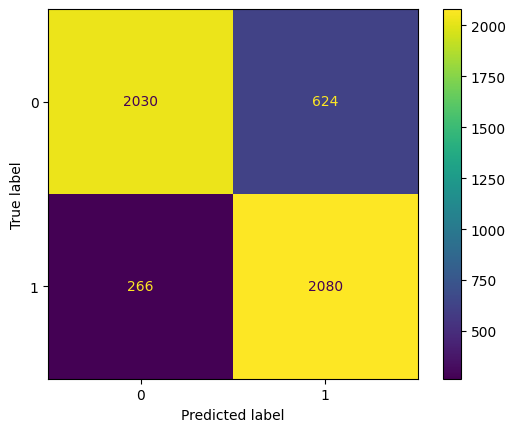


📈 HYBRID RECOMMENDER EVALUATION (TOP-{k}):
📦 Total candidates: 24964
✅ Filtered by content: 2943
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 2803
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 3601
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 5240
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 3941
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 2884
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 2313
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 4706
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 2424
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 37
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 1010
🌟 Final recommendations: 10
📦 Total candidates: 24964
✅ Filtered by content: 1068
🌟 

In [24]:


# Reuse your evaluation function
evaluate_hybrid_model(test_df, classifier, image_features, k=10,sample_size=50)


